# Question 1

In [1]:
def my_method():
    item_count = round(float(input("Please enter any preferred integer number ---> ")))
    print([1/item for item in range(1, item_count+1)])

In [2]:
my_method()

Please enter any preferred integer number ---> 5
[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]


# Question 2

### (a)

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sys import stdout
from sklearn import model_selection
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [4]:
#Load the dataset
df = pd.read_csv("FB_data_train.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/20/2019,190.949997,191.160004,187.639999,189.529999,189.529999,14635700.0
1,6/21/2019,188.750000,192.000000,188.750000,191.139999,191.139999,22751200.0
2,6/24/2019,192.419998,193.979996,191.570007,192.600006,192.600006,15509000.0
3,6/25/2019,192.880005,193.139999,188.130005,188.839996,188.839996,16750300.0
4,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600.0
...,...,...,...,...,...,...,...
248,6/15/2020,NaN,NaN,NaN,NaN,NaN,NaN
249,6/16/2020,NaN,NaN,NaN,NaN,NaN,NaN
250,6/17/2020,NaN,NaN,NaN,NaN,NaN,NaN
251,6/18/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop empty rows
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/20/2019,190.949997,191.160004,187.639999,189.529999,189.529999,14635700.0
1,6/21/2019,188.750000,192.000000,188.750000,191.139999,191.139999,22751200.0
2,6/24/2019,192.419998,193.979996,191.570007,192.600006,192.600006,15509000.0
3,6/25/2019,192.880005,193.139999,188.130005,188.839996,188.839996,16750300.0
4,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600.0
...,...,...,...,...,...,...,...
227,5/14/2020,202.559998,206.929993,200.690002,206.809998,206.809998,17178900.0
228,5/15/2020,205.270004,211.339996,204.119995,210.880005,210.880005,19383200.0
229,5/18/2020,212.149994,214.639999,210.940002,213.190002,213.190002,20167400.0
230,5/19/2020,213.270004,220.490005,212.830002,216.880005,216.880005,31843200.0


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
#Droping date since it is not a useful feature
#Droping 'Close' column since it is a duplicate of 'Adj Close' column which is our target variable
df = df.drop(["Date", "Close"], axis = 1)
df

,Open,High,Low,Adj Close,Volume
0,190.949997,191.160004,187.639999,189.529999,14635700.0
1,188.750000,192.000000,188.750000,191.139999,22751200.0
2,192.419998,193.979996,191.570007,192.600006,15509000.0
3,192.880005,193.139999,188.130005,188.839996,16750300.0
4,189.539993,190.759995,187.309998,187.660004,12808600.0
...,...,...,...,...,...
227,202.559998,206.929993,200.690002,206.809998,17178900.0
228,205.270004,211.339996,204.119995,210.880005,19383200.0
229,212.149994,214.639999,210.940002,213.190002,20167400.0
230,213.270004,220.490005,212.830002,216.880005,31843200.0


In [8]:
df.describe()

,Open,High,Low,Adj Close,Volume
count,232.000000,232.000000,232.000000,232.000000,2.320000e+02
mean,192.544396,194.921854,190.098018,192.679440,1.743166e+07
std,16.189402,15.665154,16.889319,16.305607,8.539603e+06
min,139.750000,148.179993,137.100006,146.009995,6.046300e+06
25%,183.765003,185.997501,181.955002,183.482502,1.143578e+07
50%,192.865005,195.029999,189.825004,192.665001,1.477565e+07
75%,203.304997,205.492500,201.097500,203.980004,2.102665e+07
max,223.500000,231.339996,223.190002,229.970001,5.016290e+07


<AxesSubplot:xlabel='Open'>

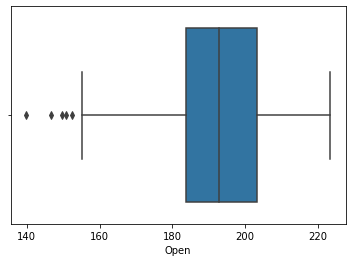

In [9]:
# Plotting a box plot to see if there are outliers
sns.boxplot(x = df['Open'])

Old Shape:  (232, 5)
New Shape:  (227, 5)


<AxesSubplot:xlabel='Open'>

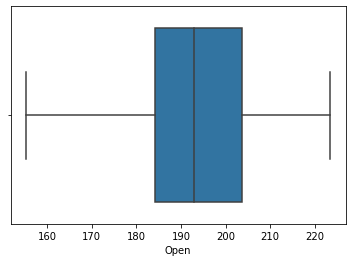

In [10]:
''' Outlier Detection '''
# IQR
Q1 = np.percentile(df['Open'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Open'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Open'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Open'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

sns.boxplot(x = df['Open'])

In [11]:
df = df.reset_index(drop=True)
df

,Open,High,Low,Adj Close,Volume
0,190.949997,191.160004,187.639999,189.529999,14635700.0
1,188.750000,192.000000,188.750000,191.139999,22751200.0
2,192.419998,193.979996,191.570007,192.600006,15509000.0
3,192.880005,193.139999,188.130005,188.839996,16750300.0
4,189.539993,190.759995,187.309998,187.660004,12808600.0
...,...,...,...,...,...
222,202.559998,206.929993,200.690002,206.809998,17178900.0
223,205.270004,211.339996,204.119995,210.880005,19383200.0
224,212.149994,214.639999,210.940002,213.190002,20167400.0
225,213.270004,220.490005,212.830002,216.880005,31843200.0


<AxesSubplot:xlabel='High'>

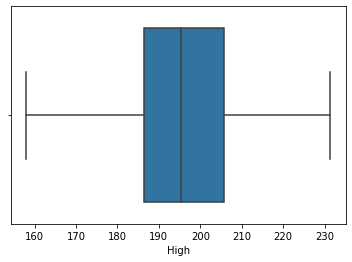

In [12]:
sns.boxplot(x = df['High'])

<AxesSubplot:xlabel='Low'>

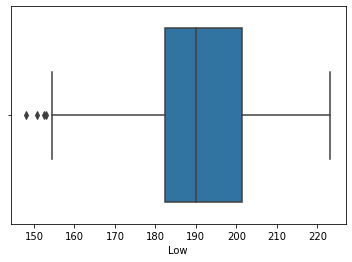

In [13]:
sns.boxplot(x = df['Low'])

Old Shape:  (227, 5)
New Shape:  (223, 5)


<AxesSubplot:xlabel='Low'>

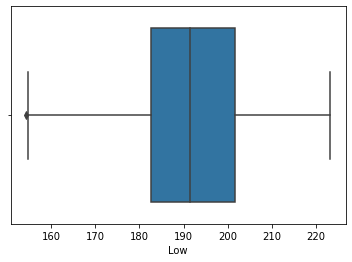

In [14]:
''' Outlier Detection '''
# IQR
Q1 = np.percentile(df['Low'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Low'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Low'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Low'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

sns.boxplot(x = df['Low'])

In [15]:
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='Volume'>

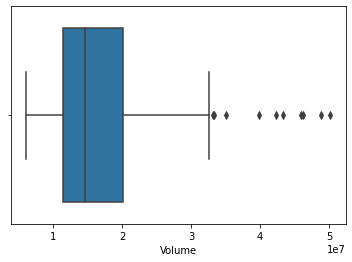

In [16]:
sns.boxplot(x = df['Volume'])

Old Shape:  (223, 5)
New Shape:  (213, 5)


<AxesSubplot:xlabel='Volume'>

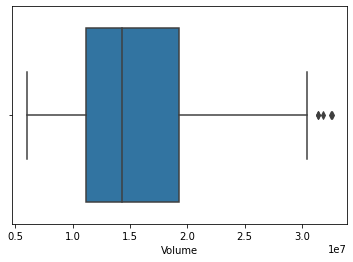

In [17]:
''' Outlier Detection '''
# IQR
Q1 = np.percentile(df['Volume'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Volume'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Volume'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Volume'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

sns.boxplot(x = df['Volume'])

In [18]:
#Standardizing the input features
df[['Open', 'High', 'Low', 'Volume']] = StandardScaler().fit_transform(df[['Open', 'High', 'Low', 'Volume']])
df

,Open,High,Low,Adj Close,Volume
0,-0.231321,-0.377440,-0.302393,189.529999,-0.164284
1,-0.391359,-0.315333,-0.223755,191.139999,1.228779
2,-0.124387,-0.168936,-0.023970,192.600006,-0.014378
3,-0.090923,-0.231044,-0.267678,188.839996,0.198697
4,-0.333891,-0.407016,-0.325772,187.660004,-0.477914
...,...,...,...,...,...
217,1.112998,1.073219,0.722738,205.100006,0.874037
218,0.613243,0.788558,0.622138,206.809998,0.272268
219,0.810382,1.114624,0.865136,210.880005,0.650646
220,1.310863,1.358619,1.348301,213.190002,0.785258


In [19]:
#Defining input features and the target
X = df.drop(['Adj Close'], axis = 1).values
y = df['Adj Close']

In [20]:
input_feats = ['Open', 'High', 'Low', 'Volume']

In [21]:
#Function to visualize the input features and the target variable
def plot_graph(input_features, X, y, title=None, ylabel="Standardized feature values", alpha=0.5, figsize=(10,6)):
    minima = min(y)
    maxima = max(y)
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    cmapper = cm.ScalarMappable(norm=norm, cmap='coolwarm')
    plt.figure(figsize=figsize)
    for y_value, X_value in zip(y, X):
        plt.plot(input_features, X_value, c=cmapper.to_rgba(y_value), alpha=alpha)
    plt.title(title)
    plt.xlabel('Input Features')
    plt.ylabel(ylabel)
    plt.colorbar(cmapper, label='Target values')

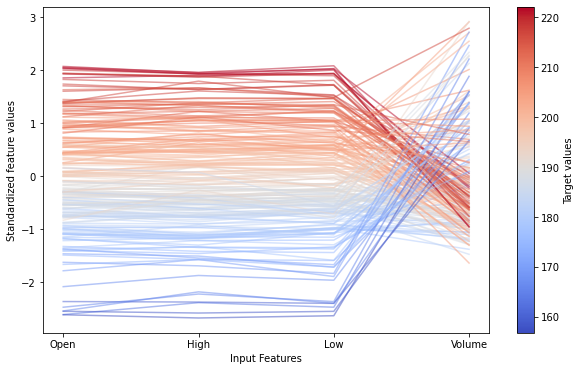

In [22]:
plot_graph(input_feats, X, y)

<AxesSubplot:>

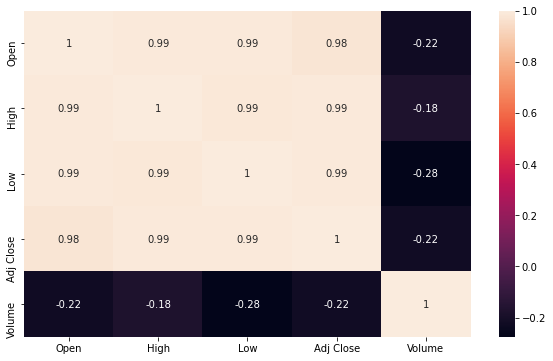

In [23]:
# Feature selection using Correlation Coefficient
cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

By looking at above two graphs we can say that 'Volume' is not very helpfull when it comes to model training. Therefore we can drop the 'Volume' column.

In [24]:
#Defining input features and the target again while dropping 'Volume'
X = df.drop(['Adj Close', 'Volume'], axis = 1).values
y = df['Adj Close']

R2 calib: 0.992
R2 CV: 0.991
RMSE calib: 1.263
RMSE CV: 1.291


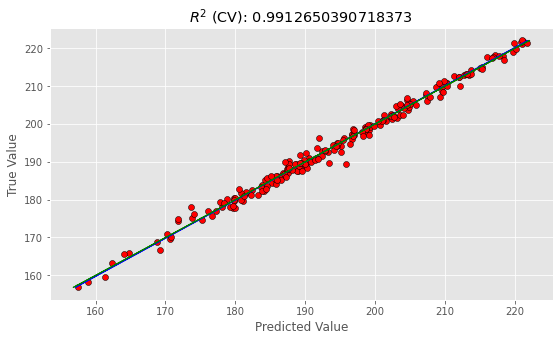

In [25]:
# Create model
linreg = LinearRegression()

# Fit to the entire dataset
linreg.fit(X, y)
y_c = linreg.predict(X)

# Cross-validation
y_cv = cross_val_predict(linreg, X, y, cv=KFold(n_splits=5, random_state=1, shuffle=True))

# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)

# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)

print('R2 calib: %5.3f'  % score_c)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE calib: %5.3f' % np.sqrt(mse_c))
print('RMSE CV: %5.3f' % np.sqrt(mse_cv))

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')

    plt.show()

### (b)

### (i)
A measure of the level of detail in a model.

### (ii)
Always depends on the problem or use case. It can be either one model or more than one.

### (iii)
A raw feature is an individual measurable property or characteristic of a phenomenon. A synthetic feature is a ratio of two other raw features. We can use correlation matrix, pair plots, histograms, scatter plots and box plots etc.

### (iv)
#### Confusion Matrix
A confusion matrix is an N X N matrix, where N is the number of classes being predicted. We can get following meassures

Accuracy : the proportion of the total number of predictions that were correct.
Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
Negative Predictive Value : the proportion of negative cases that were correctly identified.
Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
Specificity : the proportion of actual negative cases which are correctly identified.

#### F1 Score
F1-Score is the harmonic mean of precision and recall values for a classification problem.

#### Area Under the ROC curve (AUC – ROC)
The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. To bring the ROC curve down to a single number, we find the area under this curve (AUC).

#### Root Mean Squared Error (RMSE)
When we have more samples, reconstructing the error distribution using RMSE is considered to be more reliable.

#### R-Squared
When we talk about the RMSE metrics, we do not have a benchmark to compare.This is where we can use R-Squared metric.